# Importation des différentes librairies

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Importation des différentes images depuis leur répertoire

In [2]:
TRAINING_DIR = "C:/École/Syst intelligents/Projet_Final/Rock-Paper-Scissors/train"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                        target_size=(150,150),
                                                        class_mode='categorical',
                                                        batch_size=126)

VALIDATION_DIR = "C:/École/Syst intelligents/Projet_Final/Rock-Paper-Scissors/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(150,150),
                                                              class_mode='categorical',
                                                              batch_size=126)
TEST_DIR = "C:/École/Syst intelligents/Projet_Final/Rock-Paper-Scissors/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                 target_size=(150,150),
                                                 class_mode="categorical",
                                                 batch_size=126)


Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 372 images belonging to 3 classes.


# Création des couches du modèle

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
cnn= Sequential()
cnn.add(Conv2D(filters=64,activation="relu",kernel_size=3,input_shape=(150,150,3)))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=64, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=128, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=128, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(units=512, activation="relu"))
cnn.add(Dense(units=3,activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# Compilation et entrainement du modèle

In [4]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])
callback=EarlyStopping(monitor="val_loss", patience=2)
history=cnn.fit_generator(train_generator,validation_data= test_generator,epochs=5,
       # steps_per_epoch=20,
                validation_steps=3,callbacks=[callback])

Epoch 1/5
20/20 [==============================] - 93s 5s/step - loss: 1.0923 - acc: 0.3817 - val_loss: 0.9417 - val_acc: 0.4220
Epoch 2/5
20/20 [==============================] - 73s 4s/step - loss: 0.9540 - acc: 0.5274 - val_loss: 0.4974 - val_acc: 0.7849
Epoch 3/5
20/20 [==============================] - 68s 3s/step - loss: 0.7165 - acc: 0.6738 - val_loss: 0.3440 - val_acc: 0.9005
Epoch 4/5
20/20 [==============================] - 67s 3s/step - loss: 0.6132 - acc: 0.7302 - val_loss: 0.3617 - val_acc: 0.8333
Epoch 5/5
20/20 [==============================] - 68s 3s/step - loss: 0.4444 - acc: 0.8254 - val_loss: 0.1776 - val_acc: 0.9489


# Evaluation du modèle : Tableau reprenant l'historique des différents epoch et l'accuracy

In [5]:
pd.DataFrame(cnn.history.history)

,val_loss,val_acc,loss,acc
0,0.941746,0.422043,1.092329,0.381746
1,0.497408,0.784946,0.954042,0.527381
2,0.343987,0.900538,0.716518,0.673810
3,0.361678,0.833333,0.613196,0.730159
4,0.177624,0.948925,0.444395,0.825397


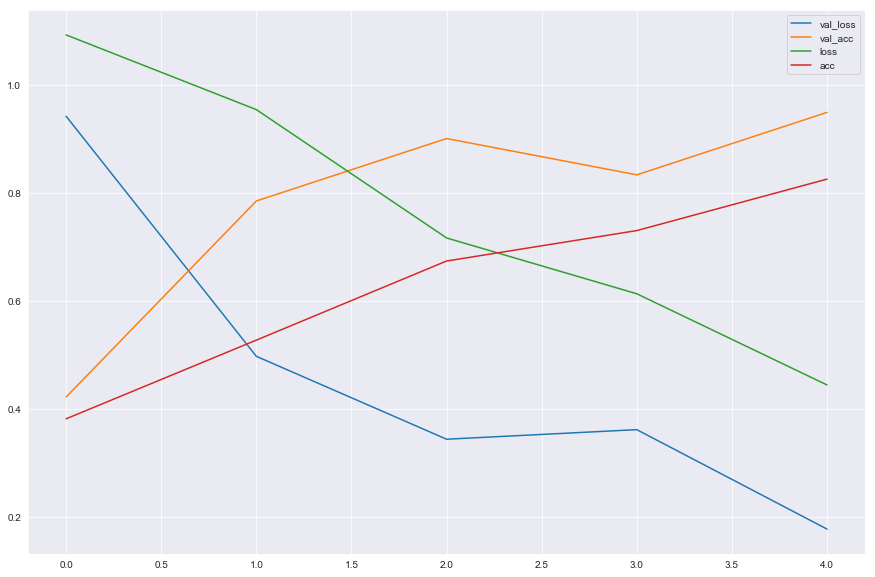

In [6]:
sns.set_style("darkgrid")
pd.DataFrame(cnn.history.history).plot(figsize=(15,10))

# Avec score , 1 par 1 et mode J vs J

In [7]:
def predictor3(imgeuh):

    test_image=cv2.resize(imgeuh, (150,150),interpolation = cv2.INTER_AREA)
    test_image=np.expand_dims(test_image, axis=0)

    result=cnn.predict(test_image)
    if result[0][0] == 1:
        val = 1  # pour papier
    elif result[0][1] == 1:
        val = 2  # pour pierre
    else:
        val = 3  # pour ciseaux
    return val

In [8]:
def ppc_txt(valeur):
    if valeur== 1:
        texte="papier"
    if valeur== 2:
        texte="pierre"
    if valeur== 3:
        texte="ciseaux"
    return texte

# Utilisation fonction cv2.putText()
   ### cv2.putText(image,texte, (x,y),police, taille_texte, couleur(B G R),épaisseur)
   ### Exemple: cv2.putText(frame,"Bonjour", (300,350),0, 1, (120,120,0),2)

In [24]:
import cv2
import random
import math
import time
from datetime import datetime

#Activation caméra
cap = cv2.VideoCapture(0)

#Condition initiale 
mode=0
scoMach=0
scoHum=0
touroj = 0
scoJ1 = 0
scoJ2 = 0
tourjj = 0
texte_X ='rien'
PerGag=''


while True:
    
    #Recupération d'une frame de la caméra
    ret, frame = cap.read()
    
    #Retour au menu
    if cv2.waitKey(1) & 0xFF == ord('s'):
        mode = 0    
    
    if mode==0: 
        
        #Menu principale
        cv2.putText(frame,"Menu", (50,50),0, 2, (0,255,0),4)
        cv2.putText(frame,"Mode prediction : 'p'", (50,200),0, 1, (120,120,0),2)
        cv2.putText(frame,"Mode J vs Ordi : 'j'", (50,275),0, 1, (120,0,120),2)  
        cv2.putText(frame,"Mode J vs J : 'u'", (50,350),0, 1, (0,120,120),2)
        cv2.putText(frame,"Pour quitter : 'q'", (50,425),0, 1, (150,200,250),2)
        
        
        #Touche du clavier pour passer entre les différents mode
        if cv2.waitKey(1) & 0xFF == ord('p'): # Pour faire la reconnaissance
            mode = 1
        if cv2.waitKey(1) & 0xFF == ord('j'): # Pour faire joueur vs ordi
            mode = 2
            touroj = 0 
            scoMach=0
            scoHum=0
        if cv2.waitKey(1) & 0xFF == ord('u'): # Pour faire joueur vs joueur
            mode = 3
            tourjj = 0
            scoJ1 = 0
            scoJ2 = 0
    
    # Mode pour la reconnaissance   
    if mode==1:   
        
        #Prediction du signe fait par l'utilisateur et affichage
        valeur= predictor3(frame) 
        texte = ppc_txt(valeur)
        
        #Affichage du signe fait par l'utilisateur
        cv2.putText(frame,texte, (50,50),0, 2, (120,120,0),4)              

        #Affichage du mode choisi
        cv2.putText(frame,"Retour au menu : 's'", (300,350),0, 1, (120,120,0),2)
        cv2.putText(frame,"Mode 1 - Prediction", (300,450),0, 1, (120,120,0),2)

    # Mode pour fight joueur vs PC
    if mode==2:
        
        #Affichage du mode choisi
        cv2.putText(frame,"Mode 2 - J vs PC", (300,450),0, 1, (120,0,120),2)
        cv2.putText(frame,"Retour au menu : 's'", (300,350),0, 1, (120,0,120),2)
        
        #Prediction du signe du joueur à l'écran
        valeur= predictor3(frame) 
        texte = ppc_txt(valeur)
        
        #Affichage du du choix actuelle du joueur et du dernier choix du pc
        cv2.putText(frame,"Moi:", (5,350),0, 1, (120,0,120),4)
        cv2.putText(frame,texte, (75,350),0, 1, (120,0,120),4)
        cv2.putText(frame,"PC:", (5,450),0, 1, (120,0,120),4)
        cv2.putText(frame,texte_X, (75,450),0, 1, (120,0,120),4)
        
        
        if touroj == 0 :
            
            #Confirmation choix du joueur contre le pc
            cv2.putText(frame,"apuyer sur 'f' pour confirmer", (50,250),0, 1, (0,0,120),3)
            cv2.putText(frame," votre choix", (100,275),0, 1, (0,0,120),3)
            if (cv2.waitKey(1) & 0xFF == ord('f')):
                
                
                #Choix aléatoire du signe que prendra la PC
                x = (math.ceil(random.random()*(10000/3334)))
                texte_X = ppc_txt(x)
                
                #Choix du gagnant et incrémentation des scores
                if valeur == x:
                    PerGag = "egalite"
                elif (valeur == 3) & (x == 1):
                    PerGag ="gagner"
                elif (valeur == 1) & (x == 2):
                    PerGag = "gagner"
                elif(valeur == 2) & (x == 3):
                    PerGag = "gagner"
                else :
                    PerGag ="perdu"   

                if PerGag=="gagner":
                    scoHum=scoHum+1
                if PerGag=="perdu":
                    scoMach=scoMach+1                    
                    
                touroj = 1

           
        if touroj == 1:
            
            #Recommencer nouvelle partie
            cv2.putText(frame,"apuyer sur 'r' pour recommencer", (50,250),0, 1, (0,0,120),3) 
            if (cv2.waitKey(1) & 0xFF == ord('r')):
                touroj = 0

         #Affichage des signes du joueur et du PC ainsi que le gagnant de ce tour     
        cv2.putText(frame,str(scoMach), (380,50),0, 1, (120,0,120),4)
        cv2.putText(frame,":", (360,50),0, 1, (120,0,120),4)
        cv2.putText(frame,str(scoHum), (330,50),0, 1, (120,0,120),4)       
        cv2.putText(frame,PerGag, (50,75),0, 2, 255,4)      
           

        
    # Mode joueur contre joueur 
    if mode==3:
        #Affichage du mode de jeu
        cv2.putText(frame,"Mode 3 - J vs J", (300,450),0, 1, (0,120,120),2)
        cv2.putText(frame,"Retour au menu : 's'", (300,350),0, 1, (0,120,120),2)
                
        if tourjj == 0 : 
 
            #prediction et affichage du choix du joueur 1
            j1= predictor3(frame)      
            texteJ1 = ppc_txt(j1)
            cv2.putText(frame,"J1", (5,450),0, 1, (0,120,120),4) 
            cv2.putText(frame,texteJ1, (75,450),0, 1, (0,120,120),4)
 
            #Confirmation du choix du joueur 1
            cv2.putText(frame," J1 : apuyer sur 'a' pour confirmer ", (50,250),0, 1, (0,0,120),3)     
            if (cv2.waitKey(1) & 0xFF == ord('a')):
                tourjj = 1 
                

        if tourjj == 1:                      
            
            #prediction et affichage du choix du joueur 2
            j2= predictor3(frame)
            texteJ2 = ppc_txt(j2)
            cv2.putText(frame,"J2", (5,350),0, 1, (0,120,120),4) 
            cv2.putText(frame,texteJ2, (75,350),0, 1, (0,120,120),4)  
            
            #Confirmation du choix du joueur 2
            cv2.putText(frame," J2 : apuyer sur 'e' pour confirmer ", (50,250),0, 1, (0,0,120),3)           
            if (cv2.waitKey(1) & 0xFF == ord('e')):
                tourjj = 2                 
                 
            
        if tourjj == 2:        
            
            #Choix du gagnant et incrémentation des scores
            if j1 == j2:
                PerGag = "egalite"
            elif (j1 == 3) & (j2 == 1):
                PerGag ="gagner J1"
            elif (j1 == 1) & (j2 == 2):
                PerGag = "gagner J1"
            elif(j1 == 2) & (j2 == 3):
                PerGag = "gagner J1"
            else :
                PerGag ="gagner J2"    

            if PerGag=="gagner J1":
                scoJ1=scoJ1+1
            if PerGag=="gagner J2":
                scoJ2=scoJ2+1
            
            tourjj = 3
        
        
        if tourjj == 3:
            
            #Affichage des signes de chaque joueur et du gagnant de ce tour            
            cv2.putText(frame,"J1", (5,450),0, 1, (0,120,120),2) 
            cv2.putText(frame,texteJ1, (75,450),0, 1, (0,120,120),2)
            cv2.putText(frame,"J2", (5,350),0, 1, (0,120,120),2) 
            cv2.putText(frame,texteJ2, (75,350),0, 1, (0,120,120),2)  
            cv2.putText(frame,PerGag, (50,75),0, 2, 255,4)
            
            #Affichage de la touche pour recommencer      
            cv2.putText(frame,"apuyer sur 'r' pour recommencer", (50,250),0, 1, (0,0,120),3)
            if (cv2.waitKey(1) & 0xFF == ord('r')):
                tourjj = 0
        
        #Affichage des scores
        cv2.putText(frame,str(scoJ2), (380,50),0, 1, (0,120,120),4)
        cv2.putText(frame,":", (360,50),0, 1, (0,120,120),4)
        cv2.putText(frame,str(scoJ1), (330,50),0, 1, (0,120,120),4)

    #Touche pour quitter le programme
    if cv2.waitKey(1) & 0xFF == ord('q') :
        break
    
    #Affichage de la frame avec tout les ajouts précédents
    cv2.imshow('Detection ',frame) 
        
        
#fin du programme arret de la caméra et fermeture de la fentre de la caméra
cap.release()
cv2.destroyAllWindows()